### case1：鸢尾花数据集

0.9555555555555556


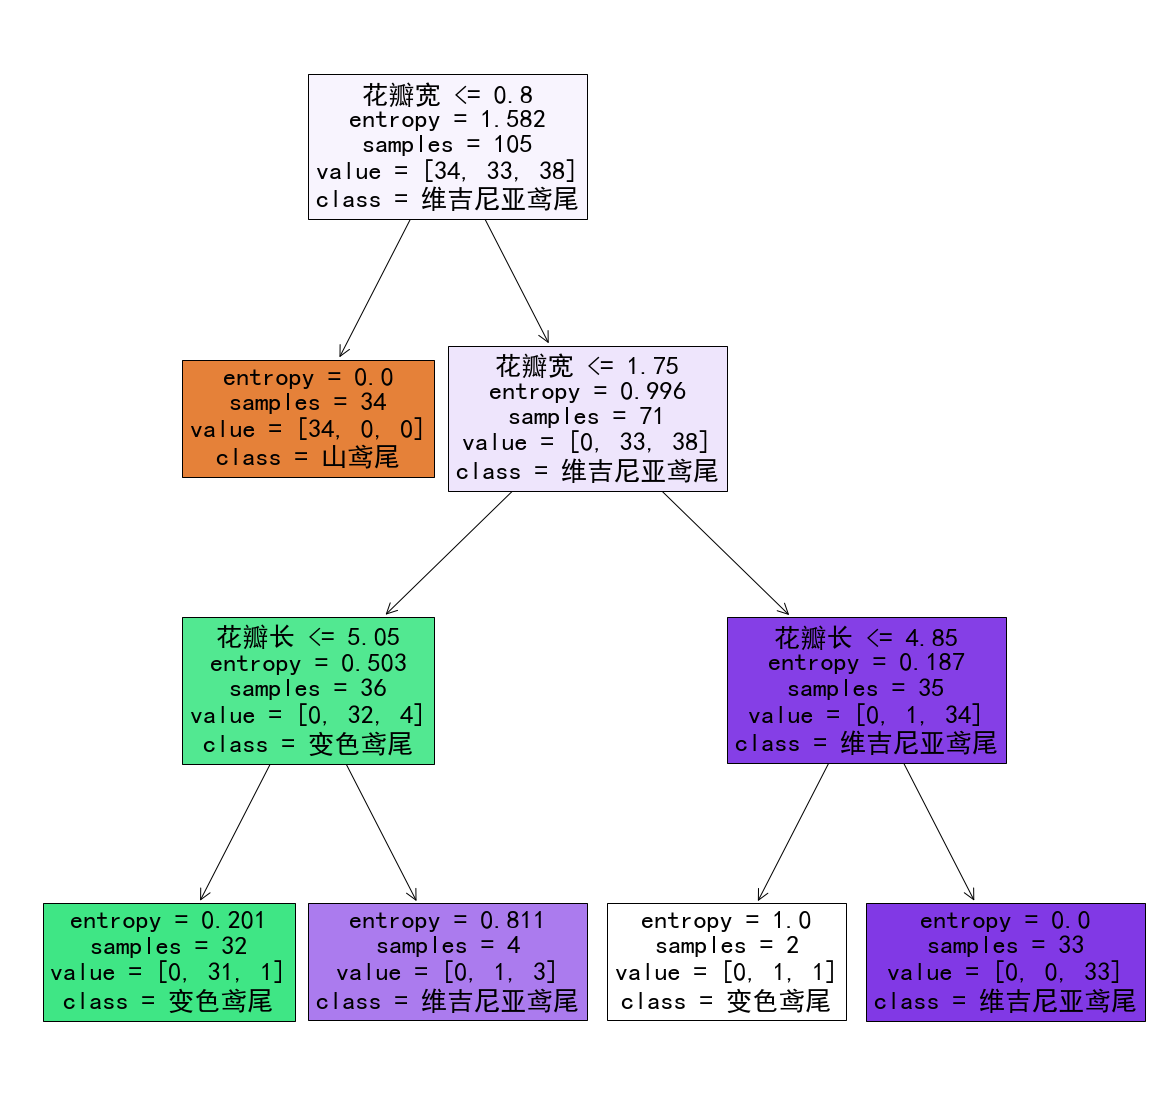

In [8]:
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image, display
font2 = {'family' : 'SimHei', 'weight' : 'normal','size': 20,}
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

#导入数据
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

#训练模型
DT = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')   # "gini' or 'entropy'
DT.fit(X_train, y_train)

#预测数据
y_pred = DT.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

#可视化,将结果保存至pdf文件
fig = plt.figure(figsize=(20,20))
tree.plot_tree(DT,filled='True',
               feature_names=['花萼长', '花萼宽', '花瓣长', '花瓣宽'],
               class_names=['山鸢尾', '变色鸢尾', '维吉尼亚鸢尾'])
plt.savefig('1.png', bbox_inches='tight', pad_inches=0.0)

### case2：如何判断要不要去打篮球？


我们该如何构造一个判断是否去打篮球的决策树呢？再回顾一下决策树的构造原理，在决策过程中有三个重要的问题：将哪个属性作为根节点？选择哪些属性作为后继节点？什么时候停止并得到目标值？

显然将哪个属性（天气、温度、湿度、刮风）作为根节点是个关键问题。


|天气|温度|湿度|刮风|打球|
|----|----|----|----|----|
|晴天 | 高|  高 | 否 | 否|
|晴天 | 高|  高 | 是 | 否|
|阴天 | 高|  高 | 否 | 是|
|下雨|  中|  高 | 否 | 是|
|下雨 | 低 | 中 | 否 | 是|
|下雨 | 低|  中 | 是 | 否|
|阴天 | 低|  中 | 是 | 是|
|晴天 | 中|  高 | 否 | 否|
|晴天 | 低|  中|  否 | 是|
|下雨 | 中 | 中 | 否 | 是|
|晴天 | 中|  中  |是 | 是|
|阴天|  中|  高 | 是 | 是|
|阴天|  高|  中 | 否 | 是|
|下雨|  中|  高 | 是 | 否|

我们分别对这四个属性进行划分，看依据哪个属性划分可以得到纯度比较高的节点。

![avatar](outlook.jpg)
![avatar](tempareture.jpg)
![avatar](humidity.jpg)
![avatar](windy.jpg)

系统越无序，越混乱，其熵就越大，也就是不确定性越大。我们将信息不确定性减少的程度称作信息增益。
计算每个属性划分带来的信息增益，在上面的例子中，基于天气的划分可以带来最大的信息增益，以天气情况为根的节点的子节点中有一个是最纯的（即完全是一个类别的数据，此时其不确定性最低，熵为0），这使得这个属性明显优于其他属性。

以此类推，接下来基于天气情况的划分上，在剩下的三个属性中进行选择。以第一个子节点“晴天”的分支为例，分别再计算以温度，湿度和是否刮风为划分属性时，信息增益的情况。




参考链接：

https://blog.csdn.net/ABin_203/article/details/105992098

http://www.doc88.com/p-6435221045648.html

https://doc.mbalib.com/view/9ff72c7739e7b65d20a0e95aaabec605.html